# Pandas

1. Importação e características gerais da base de dados  
  1.1 Importando os dados a partir de uma URL para um DataFrame  
  1.2 Atributo `shape` e método `info()`  
  1.3 Selecionando colunas em um DataFrame
2. Análise exploratória de dados  
  2.1. Valor médio de aluguel por tipo de imóvel (`mean()` e `groupby()`)  
  2.2. Percentual de cada tipo de imóvel (`value_counts()`)
3. Tratando e filtrando dados  
  3.1 Dados nulos `isnull()` `dropna()`  
  3.2 Romovendo linhas e colunas `drop()`  
  3.3 Filtros  
  3.4 Salvando os dados `to_csv()`  
4. Manipulando os dados  
  4.1 Criando colunas numéricas e categóricas

## 1 Importação e características gerais da base de dados


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv', sep=';')
print(df.shape)
df.head()

(32960, 9)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
df[['quartos', 'valor']]

,quartos,valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


## 2 Análise exploratória de dados

### Qual o valor médio de aluguel por tipo de imóvel?

In [ ]:
df.valor.mean() # media de todos os alugueis

12952.659715265761

In [ ]:
df.groupby('tipo').mean(numeric_only=True) # media de todas as grandezas em funcao do tipo de imovel

,quartos,vagas,suites,area,valor,condominio,iptu
tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [ ]:
df.groupby('tipo').valor.mean() # media apenas do valor do aluguel

tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [ ]:
df.groupby('tipo')[['valor']].mean().sort_values('valor') # transforma series em DataFrame e ordena pela coluna 'valor'

,valor
tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


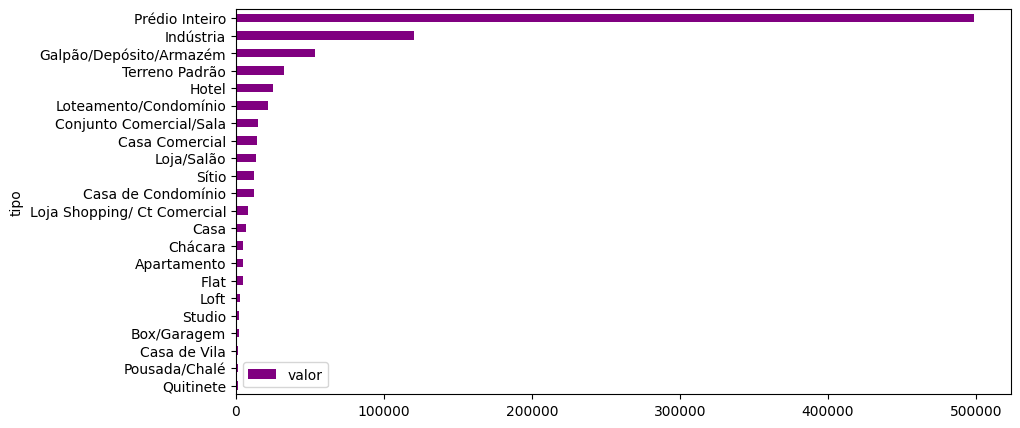

In [ ]:
df_aluguel_tipo = df.groupby('tipo')[['valor']].mean().sort_values('valor')
a = df_aluguel_tipo.plot(kind='barh', figsize=(10,5), color='purple') # grafico de barras horizontais do valor de acordo com o tipo

#### `pd.groupby()`

O método groupby do Pandas permite agrupar e resumir dados de um DataFrame, com base em um ou mais critérios. Esses critérios podem ser variáveis numéricas ou categóricas, como colunas ou índices do DataFrame.

A ideia por trás do groupby é dividir os dados em grupos com base nos critérios selecionados e, em seguida, aplicar uma operação a esses grupos. Essa operação pode ser uma função de agregação, como soma, média, contagem, desvio padrão, entre outras, ou mesmo uma operação personalizada definida pela pessoa usuária.

Outros links:  
[Pandas GroupBy: Your Guide to Grouping Data in Python](https://realpython.com/pandas-groupby/)  
[Pandas' groupby explained in detail](https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb)

### Removendo os imóveis comerciais

In [ ]:
df.tipo.unique() # todos os tipos de imoveis no DataFrame

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
imoveis_nao_residenciais = ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão', 'Galpão/Depósito/Armazém',
                            'Casa Comercial', 'Terreno Padrão', 'Box/Garagem', 'Loja Shopping/ Ct Comercial',
                            'Chácara', 'Loteamento/Condomínio', 'Sítio', 'Pousada/Chalé', 'Hotel', 'Indústria'] # apenas imoveis comerciais
len(imoveis_nao_residenciais)

14

In [ ]:
df.query('@imoveis_nao_residenciais in tipo').head() # selecao usando notacao com `@`

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN


In [ ]:
df = df.query(f'tipo not in {imoveis_nao_residenciais}') # atribui novo df apos fazer a selecao pretendida
df.tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

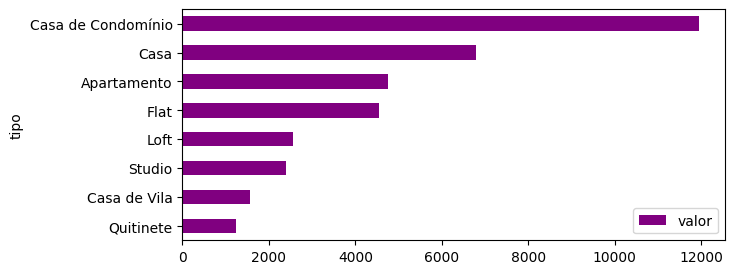

In [ ]:
df_aluguel_tipo = df.groupby('tipo')[['valor']].mean().sort_values('valor')
a = df_aluguel_tipo.plot(kind='barh', figsize=(7,3), color='purple') # grafico de barras horizontais do valor de acordo com o tipo

### Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [ ]:
df.tipo.value_counts(normalize=True)

Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: tipo, dtype: float64

In [ ]:
(df.tipo.value_counts(normalize=True)*100).to_frame().sort_values('tipo', ascending=False)

,tipo
Apartamento,84.513868
Casa de Condomínio,4.309636
Casa,4.184155
Quitinete,3.617325
Flat,2.059625
Casa de Vila,1.077409
Loft,0.220674
Studio,0.017308


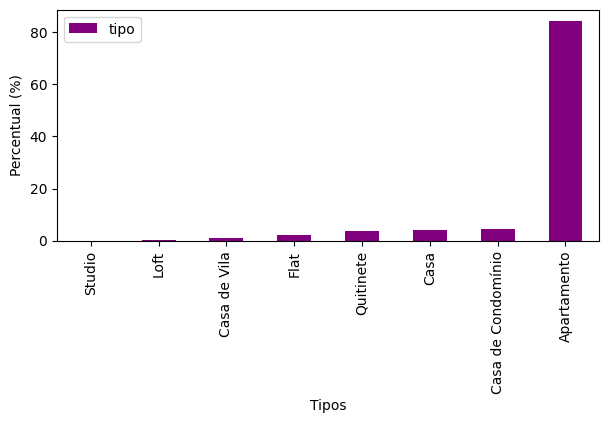

In [ ]:
df_perc_tipo = (df.tipo.value_counts(normalize=True)*100).to_frame().sort_values('tipo')
a = df_perc_tipo.plot(kind='bar', figsize=(7,3), color='purple', xlabel='Tipos', ylabel='Percentual (%)')

### Selecionando apenas os imóveis do tipo apartamento

Avaliando o percentual de cada tipo de imóvel verificamos que o tipo Apartamento corresponde a mais de 80% dos imóveis presentes na base. Além disso, o valor médio do aluguel e outras propriedades de cada um desses tipos são bem diferentes. Enão, a partir de agora, vamos manter apenas os apartamentos na base.

In [ ]:
print(df.shape)
df = df.query("tipo == 'Apartamento'")
df.shape

(23111, 9)


(19532, 9)

## 3 Tratando e filtrando os dados

### Lidando com dados nulos

Tratar dados nulos em uma base de dados é muito importante porque esses dados faltantes podem interferir diretamente na qualidade das análises e nos resultados obtidos. Quando existem dados nulos em um conjunto de dados, podem ocorrer problemas como viés, redução da acurácia e imprecisão nas informações obtidas.

Além disso, algumas análises e modelos estatísticos não são capazes de lidar com a presença de dados faltantes. Por isso, o tratamento dos dados nulos é fundamental para garantir a confiabilidade e a precisão das análises e decisões tomadas a partir desses dados.

Existem diversas formas de tratar dados nulos com o Pandas. Algumas das principais formas são:

- Remover os dados nulos: É possível remover as linhas ou colunas que possuem valores nulos utilizando o método `dropna()` . Esse método remove todas as linhas ou colunas que possuem pelo menos um valor nulo.
- Preencher os dados nulos: Utilizando o método `fillna()`, podemos preencher os valores nulos com um valor específico. Além disso, também é possível utilizar argumentos específicos do método `fillna()` como o `method=”ffill”` ou `method=”bfill”` para preencher os valores nulos com o valor anterior ou posterior, respectivamente.
- Interpolar os dados nulos: É possível utilizar o método `interpolate()` para preencher os valores nulos com valores interpolados, ou seja, valores calculados a partir dos valores vizinhos.

É importante escolher a melhor forma de tratar os dados nulos de acordo com a situação específica e o objetivo da análise de dados.


In [ ]:
df.isnull().head()

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True


In [ ]:
df.isnull().sum().sort_values(ascending=False)

iptu          5472
condominio     745
valor            7
tipo             0
bairro           0
quartos          0
vagas            0
suites           0
area             0
dtype: int64

In [ ]:
df = df.fillna(0) # preenche dados nulos com valor zero
df.isnull().sum()

tipo          0
bairro        0
quartos       0
vagas         0
suites        0
area          0
valor         0
condominio    0
iptu          0
dtype: int64

### Removendo registros

Registros com custo de aluguel ou taxa de condomínio zerados são inconsistências, portanto, devem ser removidos. Da mesma forma, a coluna `tipo` possui um único valor possível, tornando-se desnecessária.

In [ ]:
df.query('valor == 0 or condominio == 0').head() # seleciona as linhas que devems ser removidas

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0


In [ ]:
df.query('valor == 0 or condominio == 0').head().index # indices das linhas que devem ser removidas

Int64Index([5, 10, 76, 113, 166], dtype='int64')

In [ ]:
print(df.shape)
df.drop(df.query('valor == 0 or condominio == 0').head().index, axis=0, inplace=True) # remove linhas pelos indices de modo inplace
df.shape

(19532, 9)


(19527, 9)

In [ ]:
print(df.columns)
df.drop('tipo', axis=1, inplace=True) # remove coluna 'tipo'
df.columns

Index(['tipo', 'bairro', 'quartos', 'vagas', 'suites', 'area', 'valor',
       'condominio', 'iptu'],
      dtype='object')


Index(['bairro', 'quartos', 'vagas', 'suites', 'area', 'valor', 'condominio',
       'iptu'],
      dtype='object')

### Filtros

#### 1. Apartamentos que possuem **1 quarto** e **aluguel menor que 1200**



In [ ]:
df['quartos'] == 1 # series booleana das linhas que satisfazem a condicao de 1 quarto

3         True
4         True
6        False
11       False
12       False
         ...  
32951    False
32953    False
32956    False
32957    False
32958    False
Name: quartos, Length: 19527, dtype: bool

In [ ]:
df[df['quartos'] == 1].head() # passando uma series boleana no DataFrame, selecionamos todas as linhas True

,bairro,quartos,vagas,suites,area,valor,condominio,iptu
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0


In [ ]:
(df['valor'] < 1200)[:5] # series booleana das linhas que satisfazem a condicao de aluguel menor que 1200

3      True
4      True
6     False
11    False
12    False
Name: valor, dtype: bool

In [ ]:
df[df['valor'] < 1200].head()

,bairro,quartos,vagas,suites,area,valor,condominio,iptu
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0


In [ ]:
df_q1_v1200 = df[(df['quartos'] == 1) & (df['valor'] < 1200)]
print(df_q1_v1200.shape)
df_q1_v1200.head()

(623, 8)


,bairro,quartos,vagas,suites,area,valor,condominio,iptu
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0


#### 2. Apartamentos que possuem pelo menos **2 quartos**, **aluguel menor que 3000** e **area maior que 70**

In [ ]:
df_q2_v3000_a70 = df[(df['quartos'] >= 2) & (df['valor'] < 3000) & (df['area'] > 70)]
print(df_q2_v3000_a70.shape)
df_q2_v3000_a70.head()

(4583, 8)


,bairro,quartos,vagas,suites,area,valor,condominio,iptu
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0


### Salvando os dados

In [ ]:
df.to_csv('dados_apartamentos.csv') # exportando DataFrame para arquivo CSV

In [ ]:
pd.read_csv('dados_apartamentos.csv').head()

,Unnamed: 0,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [ ]:
df.to_csv('dados_apartamentos.csv', index=False) # exportando DataFrame para arquivo CSV, sem colocar os indices em uma coluna
pd.read_csv('dados_apartamentos.csv').head()

,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [ ]:
pd.read_csv('dados_apartamentos.csv', sep=';').head() # carrega novo arquivo usando separador do arquivo original

,"bairro,quartos,vagas,suites,area,valor,condominio,iptu"
0,"Centro,1,0,0,15,800.0,390.0,20.0"
1,"Higienópolis,1,0,0,48,800.0,230.0,0.0"
2,"Cachambi,2,0,0,50,1300.0,301.0,17.0"
3,"Grajaú,2,1,0,70,1500.0,642.0,74.0"
4,"Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0"


In [ ]:
df.to_csv('dados_apartamentos.csv', index=False, sep=';') # exportando DataFrame para arquivo CSV, sem colocar os indices em uma coluna e com o mesmo separador do arquivo original

In [ ]:
pd.read_csv('dados_apartamentos.csv', sep=';').head() # carrega versao final (ate o momento) do novo arquivo

,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


## 4 Manipulando os dados

### Criando colunas numéricas

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv', sep=';').fillna(0) # carrega base de dados novamente
df.columns = df.columns.str.lower()

In [ ]:
df['valor_total_mes'] = df.valor + df.condominio

In [ ]:
df['valor_total_ano'] = df.valor_total_mes*12 + df.iptu
df.head()

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor_total_mes,valor_total_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0


### Criando colunas categóricas

In [ ]:
df['descricao'] = df.tipo + " em " + df.bairro + " com " + df.quartos.astype(str) + " quarto(s) " + " e " + df.quartos.astype(str) + " vaga(s) de garagem."

In [ ]:
df['possui_suite'] = df.suites.apply(lambda x: "sim" if x > 0 else "nao")
df.head()

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor_total_mes,valor_total_ano,descricao,possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 1 v...,nao
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) e 2 v...,sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,nao
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 1 vag...,nao
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis com 1 quarto(s) e...,nao
